# Cancer Cell Image Classification using Tensorflow

Original data was color images of 50 by 50 pixels. Those images were converted to 50 by 50 by 3 numpy arrays and that is the data loaded here. There were many variations of this network run in attempts to optimize. For brevity, one of the better models is shown below. 

The output is the trained model and weights which could be used to analyze new images for breast cancer cells.

In [2]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import sklearn
from keras import backend as K
from keras.layers import Conv2D, MaxPooling2D

Using TensorFlow backend.


In [3]:
from sklearn.metrics import confusion_matrix

#### Load Data and Merge

In [ ]:
X1 = np.load('benign_subset_rgb.npy')
X2 = np.load('malignant_subset_rgb.npy')

In [5]:
X1.shape

(10000, 50, 50, 3)

In [6]:
X2.shape

(10000, 50, 50, 3)

In [7]:
X11 = X1[0:10000]

In [8]:
X22 = X2[0:10000]

In [9]:
X = np.concatenate((X11,X22), axis = 0)

In [10]:
X.shape

(20000, 50, 50, 3)

In [11]:
Y1 = np.zeros((len(X11),), dtype=int)

In [12]:
Y2 = np.ones((len(X22),), dtype=int)

In [13]:
Y = np.concatenate((Y1,Y2))

In [14]:
Y.shape

(20000,)

In [15]:
print('Total number of images : {}'.format(len(X)))
print('Number of images without cancer : {}'.format(np.sum(Y==0)))
print('Number of images with cancer : {}'.format(np.sum(Y==1)))
print('Percentage of positive images : {:.2f}%'.format(100*np.mean(Y)))
print('Image shape (number of rows, number of columns, channels RGB): {}'.format(X[0].shape))

Total number of images : 20000
Number of images without cancer : 10000
Number of images with cancer : 10000
Percentage of positive images : 50.00%
Image shape (number of rows, number of columns, channels RGB): (50, 50, 3)


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

print("Training Data Shape:", X_train.shape, X_train.shape)
print("Testing Data Shape:", X_test.shape, X_test.shape)

Training Data Shape: (16000, 50, 50, 3) (16000, 50, 50, 3)
Testing Data Shape: (4000, 50, 50, 3) (4000, 50, 50, 3)


In [17]:
import keras
from keras.models import Sequential
from keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta
from keras.layers import Dense, Activation, Dropout
from keras.layers.advanced_activations import LeakyReLU
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras.models import model_from_json

# Encode labels to hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_train = to_categorical(Y_train, num_classes = 2)
Y_test = to_categorical(Y_test, num_classes = 2)

#### Create and Run Model

In [16]:
batch_size = 128
num_classes = 2
epochs = 24

model6 = Sequential()

model6.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1),
                 padding='same',
                 activation='relu',
                 input_shape=X_train[0].shape))
model6.add(Conv2D(32, (3, 3), activation='relu'))
model6.add(MaxPooling2D(pool_size=(2, 2)))
model6.add(Dropout(0.25))

model6.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1),
                 padding='same',
                 activation='relu',
                 input_shape=X_train[0].shape))
model6.add(Conv2D(64, (3, 3), activation='relu'))
model6.add(MaxPooling2D(pool_size=(2, 2)))
model6.add(Dropout(0.25))

model6.add(Flatten())
model6.add(Dense(512, activation='relu'))
model6.add(Dropout(0.5))
model6.add(Dense(num_classes, activation='softmax'))

optimizer = Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)

model6.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [17]:
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
featurewise_center=False,  # set input mean to 0 over the dataset
samplewise_center=False,  # set each sample mean to 0
featurewise_std_normalization=False,  # divide inputs by std of the dataset
samplewise_std_normalization=False,  # divide each input by its std
zca_whitening=False,  # apply ZCA whitening
rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
horizontal_flip=True,  # randomly flip images
vertical_flip=False)  # randomly flip images

# Compute quantities required for feature-wise normalization
# (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(X_train)

# Fit the model on the batches generated by datagen.flow().
model6.fit_generator(datagen.flow(X_train, Y_train,
                                     batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(X_test, Y_test),
                    workers=4)

Epoch 1/24
313/313 [==============================] - 766s 2s/step - loss: 0.6762 - acc: 0.5910 - val_loss: 0.6135 - val_acc: 0.6705
Epoch 2/24
313/313 [==============================] - 735s 2s/step - loss: 0.5660 - acc: 0.7243 - val_loss: 0.4979 - val_acc: 0.7756
Epoch 3/24
313/313 [==============================] - 733s 2s/step - loss: 0.5202 - acc: 0.7544 - val_loss: 0.4771 - val_acc: 0.7883
Epoch 4/24
313/313 [==============================] - 730s 2s/step - loss: 0.4951 - acc: 0.7736 - val_loss: 0.4303 - val_acc: 0.8085
Epoch 5/24
313/313 [==============================] - 733s 2s/step - loss: 0.4767 - acc: 0.7842 - val_loss: 0.4276 - val_acc: 0.8151
Epoch 6/24
313/313 [==============================] - 737s 2s/step - loss: 0.4552 - acc: 0.7978 - val_loss: 0.4072 - val_acc: 0.8223
Epoch 7/24
313/313 [==============================] - 731s 2s/step - loss: 0.4460 - acc: 0.8058 - val_loss: 0.3845 - val_acc: 0.8330
Epoch 8/24
313/313 [==============================] - 708s 2s/step - 

In [18]:
score = model6.evaluate(X_test, Y_test, verbose=0)
print('Keras CNN - accuracy:', score[1])

Keras CNN - accuracy: 0.8616


#### Save Model and Model Weights

In [28]:
model6.save_weights('mod_weights86')
# serialize model to JSON
model_json = model6.to_json()
with open("model86.json", "w") as json_file:
    json_file.write(model_json)

In [19]:
model6.save_weights('mod_weights86')

### Plot Matrix

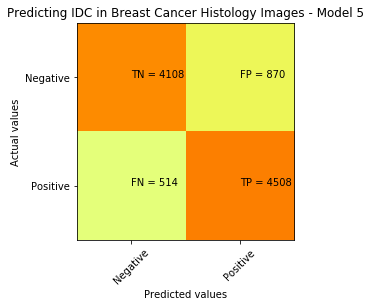

In [27]:
Y_pred = loaded_model.predict(X_test)
Y_pred_class = np.argmax(Y_pred,axis = 1) 
Y_actual = np.argmax(Y_test,axis = 1) 
confusion_mtx = confusion_matrix(Y_actual, Y_pred_class) 

plt.clf()
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Predicting IDC in Breast Cancer Histology Images - Model 5')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]

for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(confusion_mtx[i][j]))
plt.show()

---